In [1]:
# Isabella Sturm
# 2022-01-22
# Exploratory Data Analysis of NFL and Pro-Football Reference data

In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [3]:
# Import the data from
nfl_df = pd.read_csv('nfl_stats_1970_2021.csv')
pfr_df = pd.read_csv('pfr_stats_1976_2021.csv')

In [4]:
nfl_df.head()

,Unnamed: 0,off_passing_Team,off_passing_Att,off_passing_Cmp,off_passing_Cmp %,off_passing_Yds/Att,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_passing_Rate,...,st_punt-returns_Ret,st_punt-returns_Yds,st_punt-returns_PRet T,st_punt-returns_20+,st_punt-returns_40+,st_punt-returns_Lng,st_punt-returns_FC,st_punt-returns_FUM,st_punt-returns_P Blk,Year
0,0,Redskins Redskins,342,203,59.4,6.9,2357,23,10,90.5,...,27,45,0,0,0,0,0,0,0,1970
1,1,49ers 49ers,383,226,59.0,7.8,2990,25,10,94.7,...,48,550,0,0,0,0,0,0,0,1970
2,2,Chargers Chargers,387,192,49.6,7.6,2936,24,19,75.3,...,31,173,0,0,0,0,0,0,0,1970
3,3,Steelers Steelers,384,150,39.1,6.0,2312,12,32,35.4,...,51,281,0,0,0,0,0,0,0,1970
4,4,Cardinals Cardinals,390,178,45.6,6.9,2689,16,19,62.2,...,41,315,1,0,0,0,0,0,0,1970


In [5]:
pfr_df.head()

,Unnamed: 0,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,...,PassY.1,RushY.1,TO.1,Team,SuperBowl,SuperBowlWinner,Year,Offense,Defense,Sp. Tms
0,0,1,Mon,September 13,9:00PM ET,boxscore,L,NaN,0-1,NaN,...,197.0,204.0,3.0,Bills,False,False,1976,NaN,NaN,NaN
1,1,2,Sun,September 19,1:00PM ET,boxscore,L,NaN,0-2,NaN,...,52.0,208.0,1.0,Bills,False,False,1976,NaN,NaN,NaN
2,2,3,Sun,September 26,1:00PM ET,boxscore,W,NaN,1-2,@,...,168.0,170.0,2.0,Bills,False,False,1976,NaN,NaN,NaN
3,3,4,Sun,October 3,1:00PM ET,boxscore,W,NaN,2-2,NaN,...,341.0,161.0,6.0,Bills,False,False,1976,NaN,NaN,NaN
4,4,5,Sun,October 10,1:00PM ET,boxscore,L,NaN,2-3,@,...,63.0,207.0,4.0,Bills,False,False,1976,NaN,NaN,NaN


In [6]:
nfl_df['off_passing_Team'].unique()

array(['Redskins  Redskins', '49ers  49ers', 'Chargers  Chargers',
       'Steelers  Steelers', 'Cardinals  Cardinals', 'Eagles  Eagles',
       'Jets  Jets', 'Giants  Giants', 'Saints  Saints',
       'Patriots  Patriots', 'Vikings  Vikings', 'Dolphins  Dolphins',
       'Raiders  Raiders', 'Rams  Rams', 'Chiefs  Chiefs', 'Colts  Colts',
       'Oilers  Oilers', 'Packers  Packers', 'Lions  Lions',
       'Broncos  Broncos', 'Cowboys  Cowboys', 'Browns  Browns',
       'Bengals  Bengals', 'Bears  Bears', 'Bills  Bills',
       'Falcons  Falcons', 'Buccaneers  Buccaneers', 'Seahawks  Seahawks',
       'Jaguars  Jaguars', 'Panthers  Panthers', 'Ravens  Ravens',
       'Titans  Titans', 'Texans  Texans', 'Football Team  Football Team'],
      dtype=object)

In [7]:
# Update team name from nlf dataset so that it isn't duplicated
nfl_df['off_passing_Team'] = nfl_df['off_passing_Team'].apply(lambda x: x.split('  ')[1])

In [8]:
# Update team name from pro football reference dataset to leave only team name
pfr_df['Team'].unique()

array(['Bills', 'Patriots', 'Dolphins', 'Jets', 'Titans', 'Colts',
       'Bengals', 'Steelers', 'Browns', 'Chiefs', 'Raiders', 'Chargers',
       'Broncos', 'Cowboys', 'Eagles', 'Football Team', 'Giants',
       'Buccaneers', 'Saints', 'Falcons', 'Packers', 'Vikings', 'Bears',
       'Lions', 'Rams', 'Cardinals', '49ers', 'Seahawks', 'Jaguars',
       'Panthers', 'Ravens', 'Texans'], dtype=object)

In [9]:
# Washington Football Team was Redskins through 2019
# Update nfl dataframe so it can be joined with pro football ref
nfl_df.loc[nfl_df['off_passing_Team'] == 'Redskins', 'off_passing_Team'] = 'Football Team'

# Tennessee Titans were the Oilers through 1998
# Update nfl dataframe so it can be joined with pro football ref
nfl_df.loc[nfl_df['off_passing_Team'] == 'Oilers', 'off_passing_Team'] = 'Titans'


In [10]:
nfl_df.head()

,Unnamed: 0,off_passing_Team,off_passing_Att,off_passing_Cmp,off_passing_Cmp %,off_passing_Yds/Att,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_passing_Rate,...,st_punt-returns_Ret,st_punt-returns_Yds,st_punt-returns_PRet T,st_punt-returns_20+,st_punt-returns_40+,st_punt-returns_Lng,st_punt-returns_FC,st_punt-returns_FUM,st_punt-returns_P Blk,Year
0,0,Football Team,342,203,59.4,6.9,2357,23,10,90.5,...,27,45,0,0,0,0,0,0,0,1970
1,1,49ers,383,226,59.0,7.8,2990,25,10,94.7,...,48,550,0,0,0,0,0,0,0,1970
2,2,Chargers,387,192,49.6,7.6,2936,24,19,75.3,...,31,173,0,0,0,0,0,0,0,1970
3,3,Steelers,384,150,39.1,6.0,2312,12,32,35.4,...,51,281,0,0,0,0,0,0,0,1970
4,4,Cardinals,390,178,45.6,6.9,2689,16,19,62.2,...,41,315,1,0,0,0,0,0,0,1970


In [11]:
# Remove Unnamed: 0 columns from data frame
nfl_df = nfl_df.drop('Unnamed: 0', axis=1)
pfr_df = pfr_df.drop('Unnamed: 0', axis=1)

In [12]:
# Remove columns from nfl dataset
# All special teams data
# All named with 20+, 40+ 1st, 3rd, 4th
nfl_df = nfl_df.drop(nfl_df.filter(regex='\+').columns, axis=1)
nfl_df = nfl_df.drop(nfl_df.filter(regex='1st').columns, axis=1)
nfl_df = nfl_df.drop(nfl_df.filter(regex='4th').columns, axis=1)
nfl_df = nfl_df.drop(nfl_df.filter(regex='3rd').columns, axis=1)
nfl_df = nfl_df.drop(nfl_df.filter(regex='st_').columns, axis=1)
nfl_df.shape

(1528, 82)

In [13]:
# Rename off_passing_Team to Team and drop the other _Team columns
nfl_df = nfl_df.rename(columns={'off_passing_Team': 'Team'})
nfl_df = nfl_df.drop(nfl_df.filter(regex='_Team').columns, axis=1)

In [14]:
# Remove rows from pro football ref df where opp = bye week or date=Playoffs
pfr_df = pfr_df[pfr_df['Date'] != 'Playoffs']
pfr_df = pfr_df[pfr_df['Opp'] != 'Bye Week']
pfr_df.shape

(22824, 29)

In [15]:
# Remove unnecessary columns from pro football ref df
pfr_df = pfr_df.drop(['Week','Day','Unnamed: 3','Unnamed: 4', 
                      'Unnamed: 8', 'Opp', 'Offense', 'Defense', 'Sp. Tms'],
                    axis=1)

In [16]:
pfr_df.columns

Index(['Date', 'Unnamed: 5', 'OT', 'Rec', 'Tm', 'Opp.1', '1stD', 'TotYd',
       'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1',
       'TO.1', 'Team', 'SuperBowl', 'SuperBowlWinner', 'Year'],
      dtype='object')

In [17]:
# Create summarized dataframe for pro football reference
# Team, Year, num_wins, num_losses, min_win_score, max_win_score
# min_lose_score, max_lose_score, avg_win_score, avg_loss_score
# min_score_diff, max_score_diff, avg_score_diff
# min_off_pass_yds, max_off_pass_yds, avg_off_pass_yds
# min_off_rush_yds, max_off_rush_yds, avg_off_rush_yds
# min_def_pass_yds, max_def_pass_yds, avd_def_pass_yds
# min_def_rush_yds, max_def_rush_yds, avd_def_rush_yds

def get_summary_df(df):
    summary_df = pd.DataFrame()
    summary_df_temp = pd.DataFrame()
    
    # TODO figure out how to add columns of mismatch length to dataframe

    summary_df['num_wins'] = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['Unnamed: 5'].count() # num_wins
    summary_df['num_losses'] = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['Unnamed: 5'].count() # num_losses
    summary_df.reset_index()
    # Win Score
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['Tm'].min().to_frame('min_win_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['Tm'].max().to_frame('max_win_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['Tm'].mean().to_frame('avg_win_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Lose Score
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['Tm'].min().to_frame('min_lose_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['Tm'].max().to_frame('max_lose_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['Tm'].mean().to_frame('avg_lose_score').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Winning Offense Passing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY'].min().to_frame('min_win_off_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY'].max().to_frame('max_win_off_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY'].mean().to_frame('avg_win_off_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Losing Offense Passing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY'].min().to_frame('min_lose_off_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY'].max().to_frame('max_lose_off_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY'].mean().to_frame('avg_lose_off_pss_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Winning Offense Rushing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY'].min().to_frame('min_win_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY'].max().to_frame('max_win_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY'].mean().to_frame('avg_win_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Losing Offense Rushing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY'].min().to_frame('min_lose_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY'].max().to_frame('max_lose_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY'].mean().to_frame('avg_lose_off_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Winning Defense Passing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY.1'].min().to_frame('min_win_def_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY.1'].max().to_frame('max_win_def_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['PassY.1'].mean().to_frame('avg_win_def_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Losing Defense Passing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY.1'].min().to_frame('min_lose_def_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY.1'].max().to_frame('max_lose_def_pass_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['PassY.1'].mean().to_frame('avg_lose_def_pss_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Winning Defense Rushing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY.1'].min().to_frame('min_win_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY.1'].max().to_frame('max_win_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'W'].groupby(['Team','Year'])['RushY.1'].mean().to_frame('avg_win_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # Losing Defense Rushing Yards
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY.1'].min().to_frame('min_lose_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY.1'].max().to_frame('max_lose_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    summary_df_temp = df[df['Unnamed: 5'] == 'L'].groupby(['Team','Year'])['RushY.1'].mean().to_frame('avg_lose_def_rush_yds').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # SuperBowl (made it to SuperBowl)
    summary_df_temp = df.groupby(['Team','Year'])['SuperBowl'].max().to_frame('SuperBowl').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])
    # SuperBowlWinner (won Super Bowl)
    summary_df_temp = df.groupby(['Team','Year'])['SuperBowlWinner'].max().to_frame('SuperBowlWinner').reset_index()
    summary_df = summary_df.merge(summary_df_temp, on=['Team','Year'])                     

    return summary_df

pfr_summary_df = get_summary_df(pfr_df)
pfr_summary_df.head()


,Team,Year,num_wins,num_losses,min_win_score,max_win_score,avg_win_score,min_lose_score,max_lose_score,avg_lose_score,...,max_lose_def_pass_yds,avg_lose_def_pss_yds,min_win_def_rush_yds,max_win_def_rush_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,max_lose_def_rush_yds,avg_lose_def_rush_yds,SuperBowl,SuperBowlWinner
0,49ers,1976,8,6,15.0,37.0,23.875000,3.0,21.0,13.166667,...,283.0,135.500000,54.0,170.0,107.750000,120.0,199.0,154.000000,False,False
1,49ers,1977,5,9,10.0,28.0,17.600000,0.0,35.0,14.666667,...,257.0,145.666667,69.0,164.0,124.800000,52.0,208.0,138.333333,False,False
2,49ers,1978,2,14,6.0,28.0,17.000000,7.0,28.0,13.214286,...,255.0,168.357143,103.0,113.0,108.000000,62.0,256.0,153.357143,False,False
3,49ers,1979,2,14,20.0,23.0,21.500000,9.0,28.0,18.928571,...,338.0,203.571429,52.0,95.0,73.500000,71.0,222.0,147.571429,False,False
4,49ers,1980,6,10,12.0,38.0,26.333333,10.0,26.0,16.200000,...,304.0,208.900000,47.0,143.0,87.833333,138.0,234.0,169.100000,False,False


In [18]:
pfr_summary_df.shape

(1381, 36)

In [19]:
for col in nfl_df.columns:
    print(col)

Team
off_passing_Att
off_passing_Cmp
off_passing_Cmp %
off_passing_Yds/Att
off_passing_Pass Yds
off_passing_TD
off_passing_INT
off_passing_Rate
off_passing_Lng
off_passing_Sck
off_passing_SckY
off_rushing_Att
off_rushing_Rush Yds
off_rushing_YPC
off_rushing_TD
off_rushing_Lng
off_rushing_Rush FUM
off_receiving_Rec
off_receiving_Yds
off_receiving_Yds/Rec
off_receiving_TD
off_receiving_Lng
off_receiving_Rec FUM
off_scoring_Rsh TD
off_scoring_Rec TD
off_scoring_Tot TD
off_scoring_2-PT
off_downs_Scrm Plys
def_passing_Att
def_passing_Cmp
def_passing_Cmp %
def_passing_Yds/Att
def_passing_Yds
def_passing_TD
def_passing_INT
def_passing_Rate
def_passing_Lng
def_passing_Sck
def_rushing_Att
def_rushing_Rush Yds
def_rushing_YPC
def_rushing_TD
def_rushing_Lng
def_rushing_Rush FUM
def_receiving_Rec
def_receiving_Yds
def_receiving_Yds/Rec
def_receiving_TD
def_receiving_Lng
def_receiving_Rec FUM
def_receiving_PDef
def_scoring_FR TD
def_scoring_SFTY
def_scoring_INT TD
def_downs_Scrm Plys
def_tackles_Sc

In [20]:
nfl_df.shape

(1528, 70)

In [72]:
# Combine datasets into one dataset on Year and Team
result_df = pd.concat([nfl_df.set_index(['Team','Year']), pfr_summary_df.set_index(['Team','Year'])], 
                      axis=1, join="inner").reset_index()
result_df.shape

(1368, 104)

In [73]:
# Remove duplicate column names
result_df = result_df.loc[:, ~result_df.columns.duplicated()]

In [74]:
# Replace Team names with numerical categories and True/False to 1/0
team_codes = {'Bills': 1, 'Patriots': 2,
         'Dolphins': 3, 'Jets': 4,
         'Titans': 5, 'Colts': 6,
         'Texans':7, 'Jaguars': 8,
         'Bengals': 9, 'Steelers': 10,
         'Browns': 11, 'Ravens': 12,
         'Chiefs': 13, 'Raiders': 14,
         'Chargers': 15, 'Broncos': 16,
         'Cowboys': 17, 'Eagles': 18,
         'Football Team': 19, 'Giants': 20,
         'Buccaneers': 21, 'Saints': 22,
         'Falcons': 23, 'Panthers': 24,
         'Packers': 25, 'Vikings': 26,
         'Bears': 27, 'Lions': 28,
         'Rams': 29, 'Cardinals': 30,
         '49ers': 31, 'Seahawks': 32}

result_df2 = result_df.replace({'Team': team_codes, 
                               'SuperBowl': {False: 0, True: 1}, 
                               'SuperBowlWinner': {False: 0, True: 1} })
result_df2.head()

,Team,Year,off_passing_Att,off_passing_Cmp,off_passing_Cmp %,off_passing_Yds/Att,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_passing_Rate,...,max_lose_def_pass_yds,avg_lose_def_pss_yds,min_win_def_rush_yds,max_win_def_rush_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,max_lose_def_rush_yds,avg_lose_def_rush_yds,SuperBowl,SuperBowlWinner
0,30,1992,517,298,57.6,6.5,3344,15,24,67.4,...,349.0,221.416667,54.0,107.0,73.50,29.0,260.0,111.750000,0,0
1,2,2000,565,328,58.1,6.1,3461,18,15,75.5,...,271.0,193.181818,68.0,178.0,109.20,47.0,164.0,116.818182,0,0
2,26,1989,499,272,54.5,6.9,3468,17,19,72.0,...,256.0,177.142857,67.0,153.0,100.20,64.0,164.0,120.428571,0,0
3,25,1977,327,164,50.2,6.2,2013,6,21,48.9,...,174.0,115.400000,75.0,153.0,111.25,90.0,375.0,186.900000,0,0
4,21,2013,514,291,56.6,6.2,3181,22,12,79.6,...,370.0,241.166667,2.0,152.0,81.25,18.0,198.0,119.750000,0,0


In [75]:
# Lng columns contain strings ('T' at end of some of the values) - need to remove those
result_df2['off_passing_Lng'] = result_df['off_passing_Lng'].apply(lambda x: x.split('T')[0])
result_df2['off_rushing_Lng'] = result_df['off_rushing_Lng'].apply(lambda x: x.split('T')[0])
result_df2['off_receiving_Lng'] = result_df['off_receiving_Lng'].apply(lambda x: x.split('T')[0])
result_df2['def_passing_Lng'] = result_df['def_passing_Lng'].apply(lambda x: x.split('T')[0])
result_df2['def_rushing_Lng'] = result_df['def_rushing_Lng'].apply(lambda x: x.split('T')[0])
result_df2['def_receiving_Lng'] = result_df['def_receiving_Lng'].apply(lambda x: x.split('T')[0])
result_df2['def_interceptions_Lng'] = result_df['def_interceptions_Lng'].apply(lambda x: x.split('T')[0])


In [76]:
result_df2.describe()

,Team,Year,off_passing_Att,off_passing_Cmp,off_passing_Cmp %,off_passing_Yds/Att,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_passing_Rate,...,max_lose_def_pass_yds,avg_lose_def_pss_yds,min_win_def_rush_yds,max_win_def_rush_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,max_lose_def_rush_yds,avg_lose_def_rush_yds,SuperBowl,SuperBowlWinner
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.00000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,16.750731,1999.222953,514.548977,303.161550,58.580190,6.955994,3582.567251,21.546053,17.004386,79.69883,...,324.470760,216.124338,48.307749,158.033626,97.387684,74.002193,212.354532,137.147766,0.067251,0.032895
std,9.345283,13.277771,78.282173,61.473502,5.214892,0.724930,674.546582,7.352903,5.618314,13.14232,...,61.145926,37.334659,24.143885,40.375727,20.854504,27.522778,47.635373,25.805585,0.250549,0.178426
min,1.000000,1976.000000,187.000000,93.000000,40.700000,4.900000,1401.000000,3.000000,2.000000,22.50000,...,124.000000,66.000000,-18.000000,34.000000,34.000000,2.000000,90.000000,58.333333,0.000000,0.000000
25%,9.000000,1988.000000,474.000000,266.000000,55.200000,6.500000,3193.750000,16.000000,13.000000,71.50000,...,284.000000,192.968750,32.000000,130.000000,83.210714,55.000000,180.000000,120.656250,0.000000,0.000000
50%,17.000000,2000.000000,520.000000,305.000000,58.500000,6.900000,3578.000000,21.000000,16.000000,79.30000,...,324.000000,215.583333,45.000000,155.000000,95.618182,73.000000,208.000000,135.000000,0.000000,0.000000
75%,25.000000,2011.000000,566.250000,344.000000,62.100000,7.400000,4016.250000,26.000000,21.000000,88.40000,...,363.000000,239.839286,62.000000,182.000000,110.200000,90.250000,242.000000,153.129464,0.000000,0.000000
max,32.000000,2021.000000,740.000000,492.000000,73.400000,9.500000,5572.000000,55.000000,36.000000,122.60000,...,522.000000,346.000000,227.000000,355.000000,227.000000,296.000000,407.000000,296.000000,1.000000,1.000000


# Exploring Data

In [77]:
# Find the top features to use and explore
from sklearn.feature_selection import SelectKBest, f_classif
x_cols = [col for col in result_df.columns if col not in ['SuperBowl', 'SuperBowlWinner']]
X = result_df2[x_cols]
y = result_df2['SuperBowl']

selector = SelectKBest(f_classif, k=30)
selector.fit_transform(X,y)

array([[6.5, 15, 24, ..., 349.0, 29.0, 260.0],
       [6.1, 18, 15, ..., 271.0, 47.0, 164.0],
       [6.9, 17, 19, ..., 256.0, 64.0, 164.0],
       ...,
       [6.6, 19, 26, ..., 328.0, 61.0, 241.0],
       [7.3, 22, 14, ..., 307.0, 41.0, 223.0],
       [5.1, 18, 18, ..., 270.0, 54.0, 200.0]], dtype=object)

In [82]:
features = selector.get_support(indices=True)
print(features)
features_mod = [i-1 for i in features]
# Add team as well
features_mod.append(0)
features_mod.append(102)
features_mod.append(103)
features_df = result_df2.iloc[:,features_mod]


[  5   7   8   9  16  21  22  25  26  27  33  36  37  39  40  41  43  66
  68  70  71  73  74  75  79  81  87  94  99 100]


In [83]:
features_df.head()

,off_passing_Cmp %,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_rushing_YPC,off_receiving_Yds,off_receiving_Yds/Rec,off_receiving_Rec FUM,off_scoring_Rsh TD,off_scoring_Rec TD,...,avg_win_score,min_win_off_pass_yds,avg_win_off_pass_yds,avg_win_off_rush_yds,min_lose_def_pass_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,Team,SuperBowl,SuperBowlWinner
0,57.6,3344,15,24,3.8,3344,11.2,8,11,15,...,22.50,101.0,169.25,133.75,84.0,73.50,29.0,30,0,0
1,58.1,3461,18,15,3.3,3461,10.6,5,9,18,...,22.20,142.0,220.00,101.00,130.0,109.20,47.0,2,0,0
2,54.5,3468,17,19,4.0,3468,12.8,0,12,17,...,27.10,138.0,201.90,149.60,55.0,100.20,64.0,26,0,0
3,50.2,2013,6,21,3.1,2013,12.3,0,5,6,...,15.75,65.0,125.00,118.25,44.0,111.25,90.0,25,0,0
4,56.6,3181,22,12,3.8,3181,10.9,1,6,22,...,28.50,81.0,159.00,128.25,148.0,81.25,18.0,21,0,0


In [84]:
for col in features_df.columns:
    print(col)

off_passing_Cmp %
off_passing_Pass Yds
off_passing_TD
off_passing_INT
off_rushing_YPC
off_receiving_Yds
off_receiving_Yds/Rec
off_receiving_Rec FUM
off_scoring_Rsh TD
off_scoring_Rec TD
def_passing_Cmp %
def_passing_TD
def_passing_INT
def_passing_Lng
def_passing_Sck
def_rushing_Att
def_rushing_YPC
def_fumbles_Rush FUM
def_interceptions_INT TD
def_interceptions_Lng
num_wins
min_win_score
max_win_score
avg_win_score
min_win_off_pass_yds
avg_win_off_pass_yds
avg_win_off_rush_yds
min_lose_def_pass_yds
avg_win_def_rush_yds
min_lose_def_rush_yds
Team
SuperBowl
SuperBowlWinner


In [85]:
# Split between teams that made it to the super bowl and those that didn't for easier exploration
feature_df_sb = features_df[features_df['SuperBowl'] == 1]
feature_df_nsb = features_df[features_df['SuperBowl'] == 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2a7a66b80>,
      dtype=object)

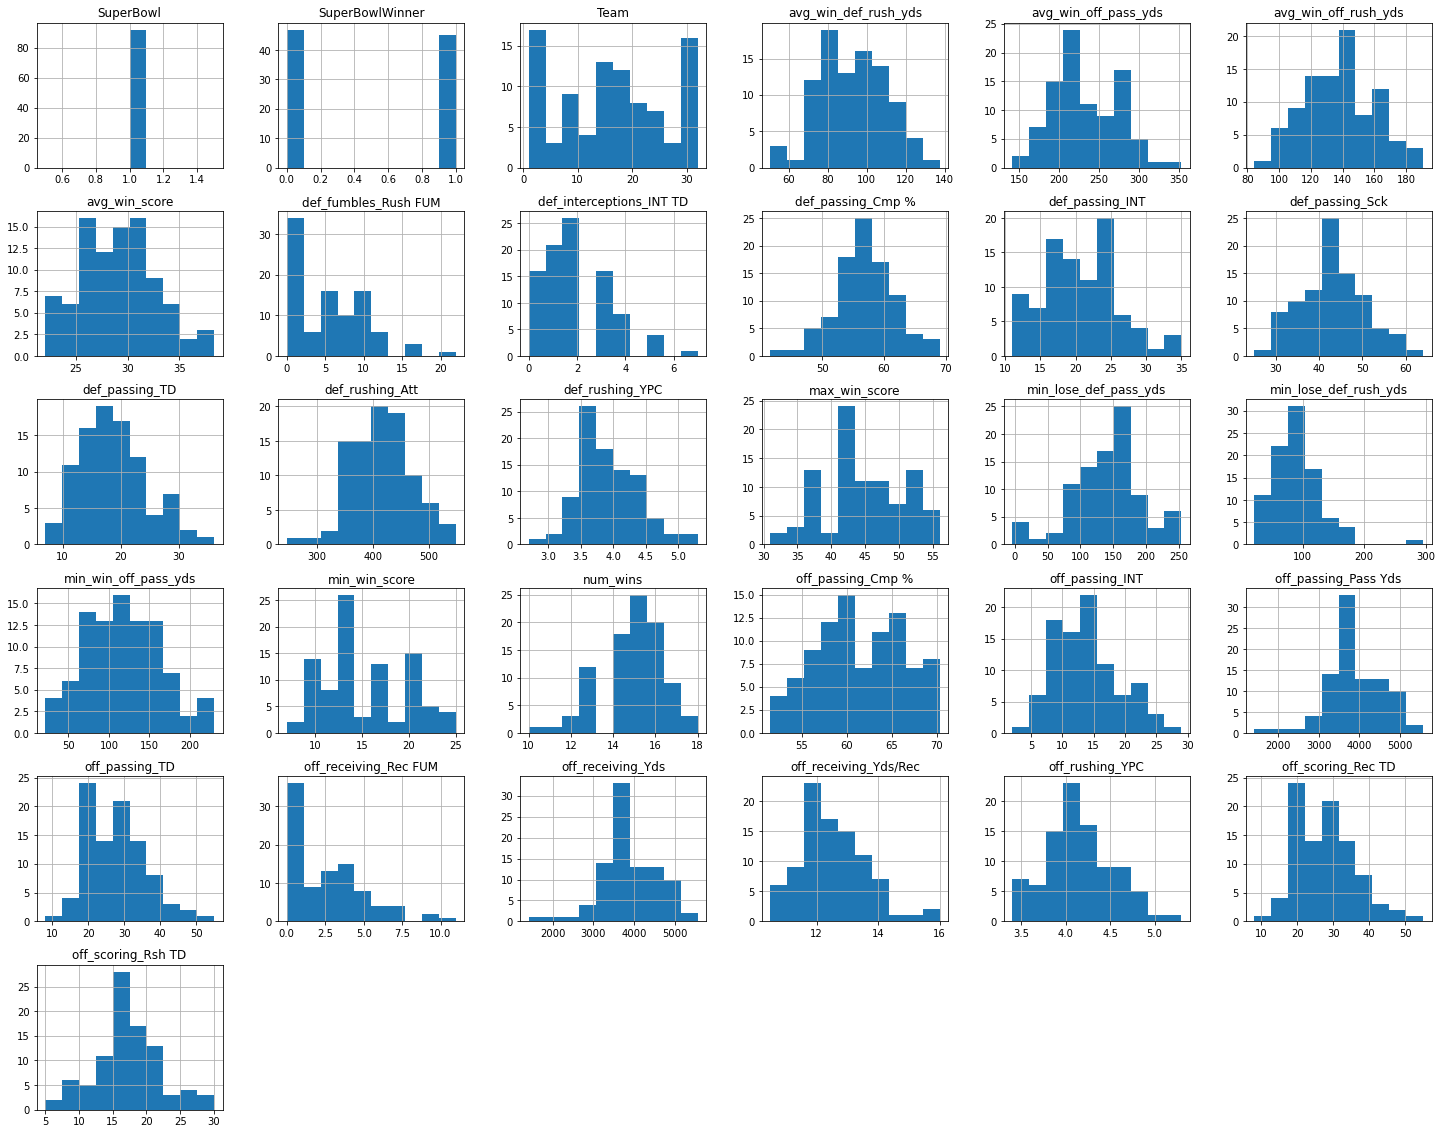

In [86]:
feature_df_sb.hist(figsize=(25,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2a86ed250>,
      dtype=object)

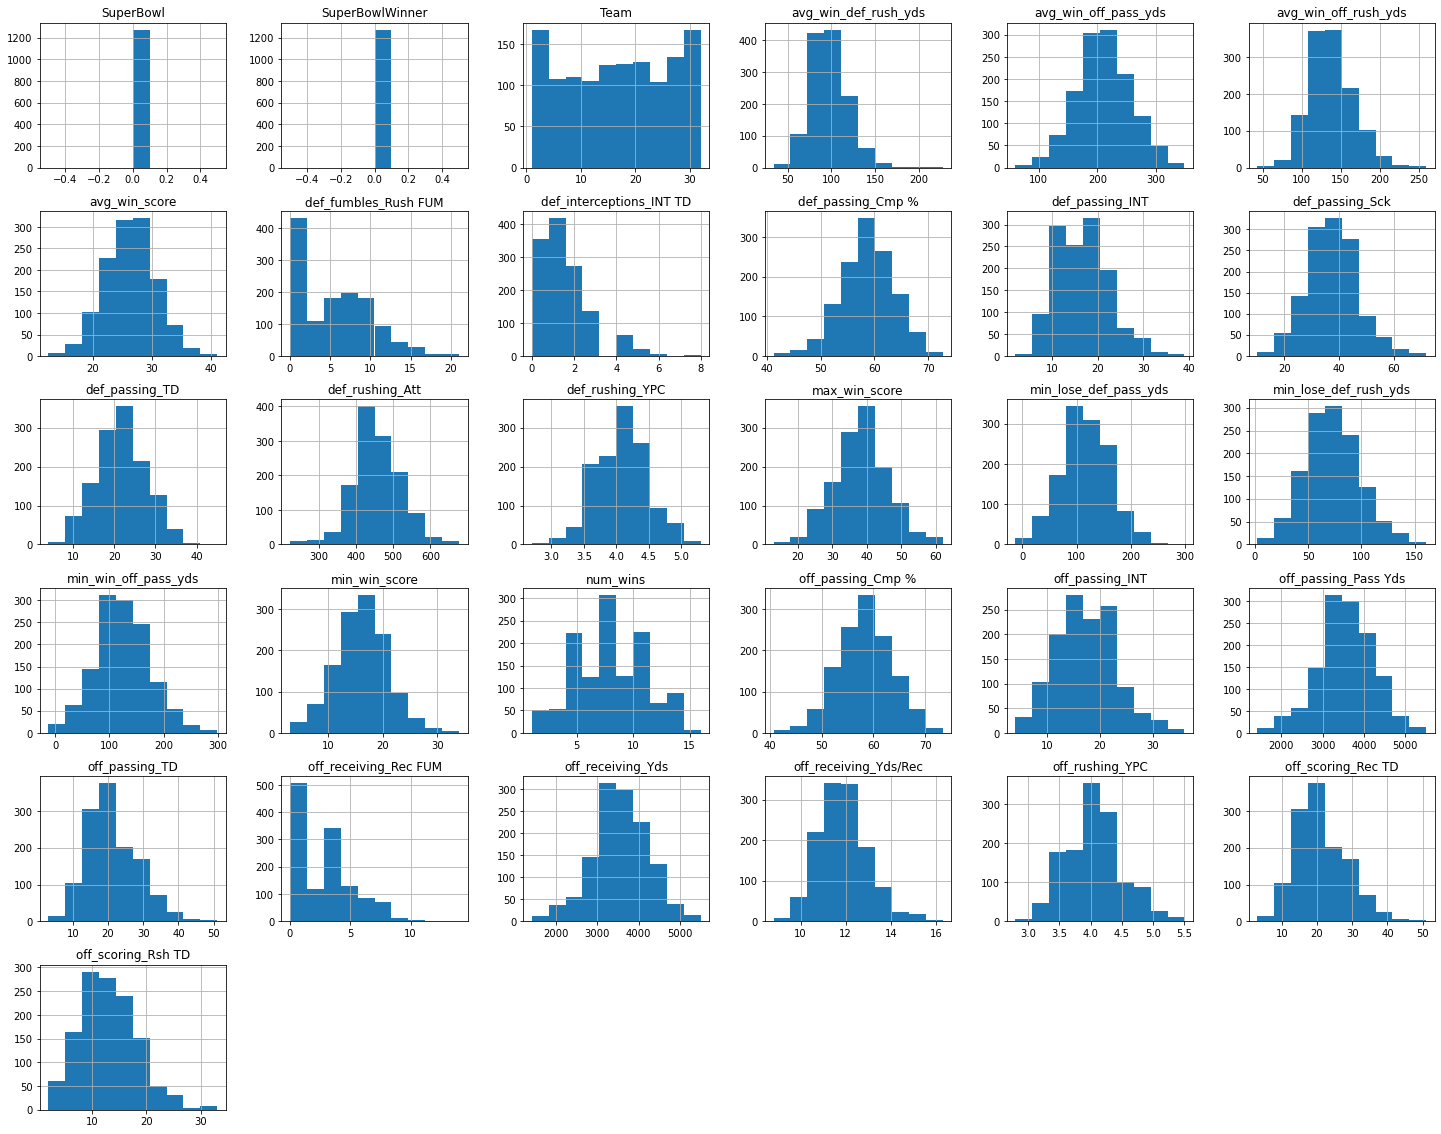

In [87]:
feature_df_nsb.hist(figsize=(25,20))

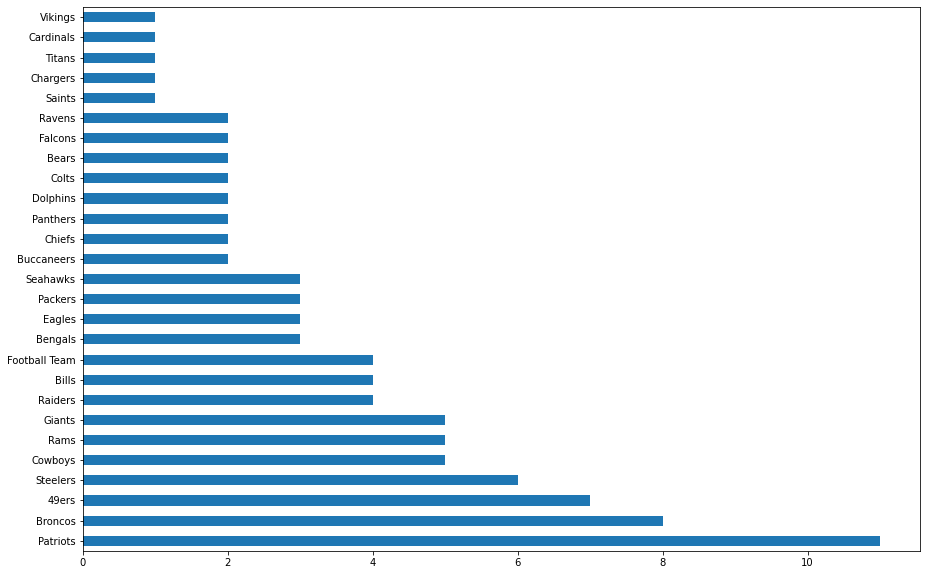

In [88]:
# Teams that have made it to the Superbowl
result_df[result_df['SuperBowl'] == 1]['Team'].value_counts().plot(kind='barh', figsize=(15,10))

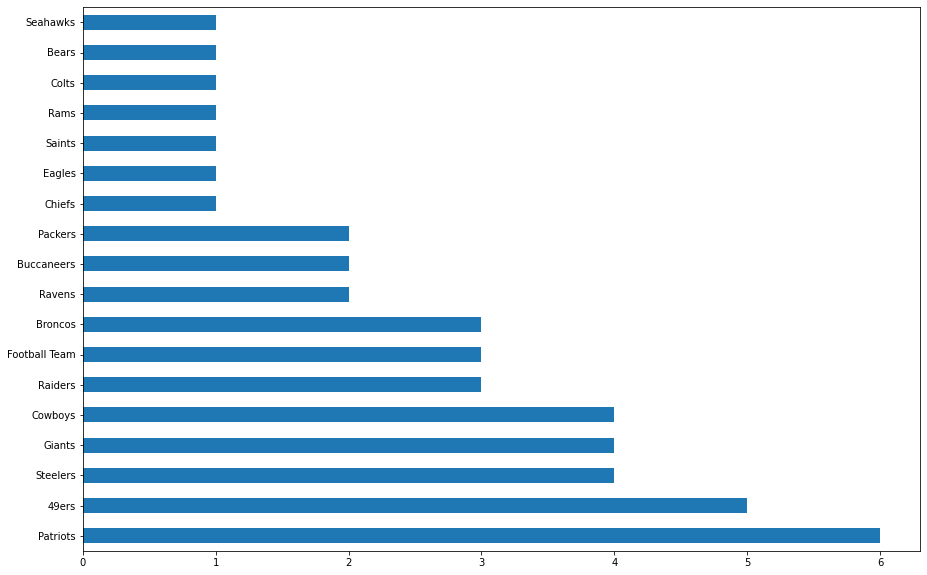

In [89]:
# Teams that have won the Superbowl
result_df[result_df['SuperBowlWinner'] == 1]['Team'].value_counts().plot(kind='barh', figsize=(15,10))

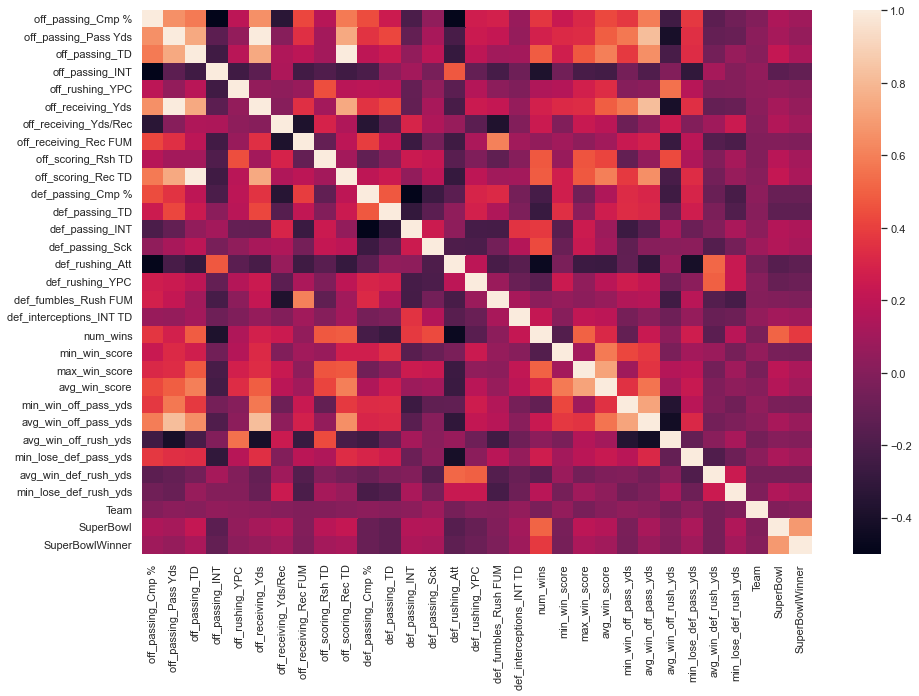

In [98]:
# Correlation matrix with reduced features
import seaborn as sns

sns.set(rc={'figure.figsize': (15,10)})

sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values, 
            yticklabels=corr_matrix.columns.values)

In [160]:
# Get 2021 data for testing/table prediction outputs
## NFL DATA
nfl_df_test = pd.DataFrame()

url_prefix = 'https://www.nfl.com/stats/team-stats/'
url_suffix = '/reg/all'
team_types = ['offense', 'defense']
off_stats = ['passing', 'rushing', 'receiving', 'scoring', 'downs']
def_stats = off_stats + ['tackles', 'fumbles', 'interceptions']
year=2021

for team in team_types:
    if team == 'offense':
        for stat in off_stats:
            url = url_prefix + team +'/'+ stat +'/'+ str(year) + url_suffix
            df = pd.read_html(url)[0]
            df = df.add_prefix('off_'+stat+'_')
            if nfl_df.empty:
                nfl_df_test = df
            else:
                df.drop('off_'+stat+'_'+'Team', axis=1)
                nfl_df_test = pd.concat([nfl_df_test, df], axis=1)
    elif team == 'defense':
        for stat in def_stats:
            url = url_prefix + team +'/'+ stat +'/'+ str(year) + url_suffix
            df = pd.read_html(url)[0]
            df = df.add_prefix('def_'+stat+'_')
            if nfl_df_test.empty:
                curr_year_df = df
            else:
                df.drop('def_'+stat+'_'+'Team', axis=1)
                nfl_df_test = pd.concat([nfl_df_test, df], axis=1)
    
nfl_df_test['Year'] = year

# Clean up values
nfl_df_test['off_passing_Team'] = nfl_df_test['off_passing_Team'].apply(lambda x: x.split('  ')[1])
nfl_df_test.loc[nfl_df_test['off_passing_Team'] == 'Redskins', 'off_passing_Team'] = 'Football Team'
nfl_df_test.loc[nfl_df_test['off_passing_Team'] == 'Oilers', 'off_passing_Team'] = 'Titans'


## Pro Football Reference Data
pfr_df_test = pd.DataFrame()

url_prefix = 'https://www.pro-football-reference.com/teams/'
url_suffix = '.htm'
teams = {'buf': 'Bills','nwe': 'Patriots',
         'mia': 'Dolphins','nyj': 'Jets',
         'oti': 'Titans','clt': 'Colts',
         'htx': 'Texans','jax': 'Jaguars',
         'cin': 'Bengals','pit': 'Steelers',
         'cle': 'Browns','rav': 'Ravens',
         'kan': 'Chiefs','rai': 'Raiders',
         'sdg': 'Chargers','den': 'Broncos',
         'dal': 'Cowboys','phi': 'Eagles',
         'was': 'Football Team','nyg': 'Giants',
         'tam': 'Buccaneers','nor': 'Saints',
         'atl': 'Falcons','car': 'Panthers',
         'gnb': 'Packers','min': 'Vikings',
         'chi': 'Bears','det': 'Lions',
         'ram': 'Rams','crd': 'Cardinals',
         'sfo': '49ers','sea': 'Seahawks'}

for team in teams:
    url = url_prefix + team +'/'+ str(year) + url_suffix
    # The first table is Team Stats and Rankings
    # Second is schedule and game results
    try:
        df = pd.read_html(url, header=1)[1]
        df['Team'] = teams[team]
        # Set up columsn for SuperBowl teams and SuperBowlWinners
        df['SuperBowl'] = False
        df['SuperBowlWinner'] = False
        pfr_df_test = pfr_df_test.append(df)
    except:
        print('No data for team {} in year {}'.format(team, year))
        
pfr_df_test['SuperBowl'].loc[pfr_df_test['Week'] == 'SuperBowl'] = True
pfr_df_test['SuperBowlWinner'].loc[(pfr_df_test['Unnamed: 5'] == 'W') & (pfr_df_test['Week'] == 'SuperBowl')] = True

pfr_df_test['Year'] = year

# Clean up dataframes
#nfl_df_test = nfl_df_test.drop('Unnamed: 0', axis=1)
#pfr_df_test = pfr_df_test.drop('Unnamed: 0', axis=1)

nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='\+').columns, axis=1)
nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='1st').columns, axis=1)
nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='4th').columns, axis=1)
nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='3rd').columns, axis=1)
nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='st_').columns, axis=1)

nfl_df_test = nfl_df_test.rename(columns={'off_passing_Team': 'Team'})
nfl_df_test = nfl_df_test.drop(nfl_df_test.filter(regex='_Team').columns, axis=1)

pfr_df_test = pfr_df_test[pfr_df_test['Date'] != 'Playoffs']
pfr_df_test = pfr_df_test[pfr_df_test['Opp'] != 'Bye Week']

pfr_df_test = pfr_df_test.drop(['Week','Day','Unnamed: 3','Unnamed: 4', 
                      'Unnamed: 8', 'Opp', 'Offense', 'Defense', 'Sp. Tms'],
                    axis=1)

summary_df_test = get_summary_df(pfr_df_test)

result_df_test = pd.concat([nfl_df_test.set_index(['Team','Year']), summary_df_test.set_index(['Team','Year'])], 
                      axis=1, join="inner").reset_index()

result_df_test = result_df_test.loc[:, ~result_df_test.columns.duplicated()]

team_codes = {'Bills': 1, 'Patriots': 2,
         'Dolphins': 3, 'Jets': 4,
         'Titans': 5, 'Colts': 6,
         'Texans':7, 'Jaguars': 8,
         'Bengals': 9, 'Steelers': 10,
         'Browns': 11, 'Ravens': 12,
         'Chiefs': 13, 'Raiders': 14,
         'Chargers': 15, 'Broncos': 16,
         'Cowboys': 17, 'Eagles': 18,
         'Football Team': 19, 'Giants': 20,
         'Buccaneers': 21, 'Saints': 22,
         'Falcons': 23, 'Panthers': 24,
         'Packers': 25, 'Vikings': 26,
         'Bears': 27, 'Lions': 28,
         'Rams': 29, 'Cardinals': 30,
         '49ers': 31, 'Seahawks': 32}

result_df_test = result_df_test.replace({'Team': team_codes, 
                               'SuperBowl': {False: 0, True: 1}, 
                               'SuperBowlWinner': {False: 0, True: 1} })

# Lng columns contain strings ('T' at end of some of the values) - need to remove those
result_df_test['off_passing_Lng'] = result_df_test['off_passing_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['off_rushing_Lng'] = result_df_test['off_rushing_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['off_receiving_Lng'] = result_df_test['off_receiving_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['def_passing_Lng'] = result_df_test['def_passing_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['def_rushing_Lng'] = result_df_test['def_rushing_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['def_receiving_Lng'] = result_df_test['def_receiving_Lng'].apply(lambda x: x.split('T')[0])
result_df_test['def_interceptions_Lng'] = result_df_test['def_interceptions_Lng'].apply(lambda x: x.split('T')[0])

result_df_test


/Users/isabellasturm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Team,Year,off_passing_Att,off_passing_Cmp,off_passing_Cmp %,off_passing_Yds/Att,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_passing_Rate,...,max_lose_def_pass_yds,avg_lose_def_pss_yds,min_win_def_rush_yds,max_win_def_rush_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,max_lose_def_rush_yds,avg_lose_def_rush_yds,SuperBowl,SuperBowlWinner
0,11,2021,520,320,61.5,7.0,3619,21,14,84.6,...,381.0,236.888889,41.0,168.0,85.500000,73.0,190.0,130.333333,0,0
1,2,2021,535,364,68.0,7.7,4098,24,13,95.5,...,445.0,221.875000,40.0,270.0,111.000000,74.0,226.0,145.875000,0,0
2,29,2021,607,406,66.9,8.1,4893,41,18,101.6,...,314.0,234.800000,35.0,165.0,83.200000,69.0,216.0,133.600000,1,0
3,16,2021,541,354,65.4,7.1,3856,20,9,91.7,...,340.0,224.000000,43.0,118.0,79.714286,86.0,216.0,133.400000,0,0
4,4,2021,603,357,59.2,6.6,3959,20,20,76.0,...,405.0,270.846154,41.0,177.0,111.500000,62.0,260.0,146.538462,0,0
5,27,2021,542,332,61.3,6.7,3635,16,20,75.5,...,322.0,210.090909,69.0,170.0,106.166667,74.0,215.0,135.454545,0,0
6,21,2021,731,492,67.3,7.4,5383,43,12,101.6,...,355.0,254.400000,-1.0,173.0,91.785714,61.0,152.0,91.200000,0,0
7,6,2021,521,324,62.2,6.9,3588,27,8,93.5,...,437.0,257.250000,35.0,179.0,102.888889,85.0,180.0,116.000000,0,0
8,20,2021,593,351,59.2,5.8,3463,15,20,70.1,...,320.0,236.692308,56.0,208.0,137.750000,68.0,226.0,126.307692,0,0
9,15,2021,674,443,65.7,7.4,5014,38,15,97.4,...,410.0,229.250000,48.0,230.0,126.111111,86.0,198.0,153.250000,0,0


In [163]:
# Get only the columns needed for the model
feature_cols = features_df.columns
result_df_test = result_df_test[feature_cols]
result_df_test

,off_passing_Cmp %,off_passing_Pass Yds,off_passing_TD,off_passing_INT,off_rushing_YPC,off_receiving_Yds,off_receiving_Yds/Rec,off_receiving_Rec FUM,off_scoring_Rsh TD,off_scoring_Rec TD,...,avg_win_score,min_win_off_pass_yds,avg_win_off_pass_yds,avg_win_off_rush_yds,min_lose_def_pass_yds,avg_win_def_rush_yds,min_lose_def_rush_yds,Team,SuperBowl,SuperBowlWinner
0,61.5,3619,21,14,5.1,3619,11.3,3,20,21,...,23.375000,143.0,184.125000,172.375000,109.0,85.500000,73.0,11,0,0
1,68.0,4098,24,13,4.4,4098,11.3,5,24,24,...,32.500000,19.0,216.000000,149.400000,49.0,111.000000,74.0,2,0,0
2,66.9,4893,41,18,4.0,4893,12.1,2,10,41,...,29.733333,197.0,287.533333,104.466667,125.0,83.200000,69.0,29,1,0
3,65.4,3856,20,9,4.5,3856,10.9,2,16,20,...,27.000000,155.0,216.571429,140.714286,136.0,79.714286,86.0,16,0,0
4,59.2,3959,20,20,4.4,3959,11.1,6,14,20,...,27.000000,100.0,228.000000,148.250000,141.0,111.500000,62.0,4,0,0
5,61.3,3635,16,20,4.2,3635,10.9,1,14,16,...,22.333333,83.0,179.666667,116.166667,61.0,106.166667,74.0,27,0,0
6,67.3,5383,43,12,4.3,5383,10.9,4,18,43,...,33.714286,217.0,307.642857,107.214286,151.0,91.785714,61.0,21,0,0
7,62.2,3588,27,8,5.1,3588,11.1,5,22,27,...,30.777778,49.0,170.777778,189.111111,188.0,102.888889,85.0,6,0,0
8,59.2,3463,15,20,4.0,3463,9.9,4,8,15,...,22.000000,98.0,223.250000,101.250000,99.0,137.750000,68.0,20,0,0
9,65.7,5014,38,15,4.3,5014,11.3,5,18,38,...,33.888889,212.0,302.666667,114.444444,140.0,126.111111,86.0,15,0,0


In [196]:
# Get lists of team_codes keys and values for reverse lookup
team_keys = list(team_codes.keys())
team_values = list(team_codes.values())

In [131]:
# Split the data for modelling
from sklearn.model_selection import train_test_split
X_features = features_df.drop(['SuperBowl', 'SuperBowlWinner'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(X_features, y, test_size = 0.33, random_state=0)

print(y_train.value_counts())
print(y_test.value_counts())


0    853
1     63
Name: SuperBowl, dtype: int64
0    423
1     29
Name: SuperBowl, dtype: int64


In [136]:
# Logistic Regression with scaled data
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipe.fit(x_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregresion', LogisticRegression())])

lr_score = lr_pipe.score(x_test, y_test)
print('Accuracy: ', lr_score)

Accuracy:  0.9579646017699115


In [219]:
# Logistric Regression table predictions

# results of predictions for each team
test_results = pd.DataFrame(columns=['Team', 'Prediction', 'Score', 'Probability_False', 'Probability_True'])

result_x = result_df_test.drop(['SuperBowl', 'SuperBowlWinner'], axis=1)
result_y = result_df_test['SuperBowl']

for i in range(0, result_df_test.shape[0]):
    result_x_test = result_x.iloc[[i]]
    result_y_test = result_y.iloc[[i]]

    prediction = lr_pipe.predict(result_x_test)
    probability = lr_pipe.predict_proba(result_x_test)
    score = lr_pipe.score(result_x_test, result_y_test)
    team_key = int(result_x_test['Team'])
    team_key_pos = team_values.index(team_key)
    team = team_keys[team_key_pos]
    result = [team, prediction[0], score, round(probability[0][0],5), round(probability[0][1], 5)]
    
    test_results.loc[len(test_results)] = result
    
test_results.sort_values(by='Probability_True', ascending=False)


,Team,Prediction,Score,Probability_False,Probability_True
2,Rams,1,1.0,0.21602,0.78398
6,Buccaneers,0,1.0,0.77397,0.22603
22,Chiefs,0,1.0,0.84532,0.15468
11,Bengals,0,0.0,0.90277,0.09723
25,Cowboys,0,1.0,0.92483,0.07517
18,Bills,0,1.0,0.94581,0.05419
21,Packers,0,1.0,0.97687,0.02313
24,Titans,0,1.0,0.97707,0.02293
16,Raiders,0,1.0,0.98277,0.01723
27,49ers,0,1.0,0.99191,0.00809


In [134]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_pipe.fit(x_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforest', RandomForestClassifier())])
rf_score = rf_pipe.score(x_test, y_test)
print('Accuracy: ', rf_score)

Accuracy:  0.9668141592920354


In [220]:
# Random Forest table predictions
# results of predictions for each team
test_results = pd.DataFrame(columns=['Team', 'Prediction', 'Score', 'Probability_False', 'Probability_True'])

result_x = result_df_test.drop(['SuperBowl', 'SuperBowlWinner'], axis=1)
result_y = result_df_test['SuperBowl']

for i in range(0, result_df_test.shape[0]):
    result_x_test = result_x.iloc[[i]]
    result_y_test = result_y.iloc[[i]]

    prediction = rf_pipe.predict(result_x_test)
    probability = rf_pipe.predict_proba(result_x_test)
    score = rf_pipe.score(result_x_test, result_y_test)
    team_key = int(result_x_test['Team'])
    team_key_pos = team_values.index(team_key)
    team = team_keys[team_key_pos]
    result = [team, prediction[0], score, probability[0][0], probability[0][1]]
    
    test_results.loc[len(test_results)] = result
    
test_results.sort_values(by='Probability_True', ascending=False)

,Team,Prediction,Score,Probability_False,Probability_True
2,Rams,1,1.0,0.22,0.78
11,Bengals,1,1.0,0.36,0.64
25,Cowboys,0,1.0,0.81,0.19
22,Chiefs,0,1.0,0.82,0.18
18,Bills,0,1.0,0.91,0.09
6,Buccaneers,0,1.0,0.92,0.08
1,Patriots,0,1.0,0.95,0.05
14,Cardinals,0,1.0,0.95,0.05
9,Chargers,0,1.0,0.97,0.03
21,Packers,0,1.0,0.97,0.03


In [205]:
# Support Vector Machine
from sklearn import svm

svm_pipe = make_pipeline(StandardScaler(), svm.SVC(probability=True))
svm_pipe.fit(x_train,y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svm', svm.SVC())])
svm_score = svm_pipe.score(x_test, y_test)
print('Accuracy: ', svm_score)

Accuracy:  0.9402654867256637


In [221]:
# SVM table predictions
# results of predictions for each team
test_results = pd.DataFrame(columns=['Team', 'Prediction', 'Score', 'Probability_False', 'Probability_True'])

result_x = result_df_test.drop(['SuperBowl', 'SuperBowlWinner'], axis=1)
result_y = result_df_test['SuperBowl']

for i in range(0, result_df_test.shape[0]):
    result_x_test = result_x.iloc[[i]]
    result_y_test = result_y.iloc[[i]]

    prediction = svm_pipe.predict(result_x_test)
    probability = svm_pipe.predict_proba(result_x_test)
    score = svm_pipe.score(result_x_test, result_y_test)
    team_key = int(result_x_test['Team'])
    team_key_pos = team_values.index(team_key)
    team = team_keys[team_key_pos]
    result = [team, prediction[0], score, probability[0][0], probability[0][1]]
    
    test_results.loc[len(test_results)] = result
    
test_results.sort_values(by='Probability_True', ascending=False)

,Team,Prediction,Score,Probability_False,Probability_True
2,Rams,0,0.0,0.137367,0.862633
11,Bengals,0,0.0,0.606978,0.393022
25,Cowboys,0,1.0,0.815357,0.184643
6,Buccaneers,0,1.0,0.854980,0.145020
27,49ers,0,1.0,0.949650,0.050350
18,Bills,0,1.0,0.949708,0.050292
16,Raiders,0,1.0,0.949734,0.050266
22,Chiefs,0,1.0,0.957197,0.042803
21,Packers,0,1.0,0.966025,0.033975
24,Titans,0,1.0,0.968072,0.031928
